<a href="https://colab.research.google.com/github/YifanSong348/SRS/blob/main/jd_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r"C:\Users\Yifan Kira\Desktop\SRS\reed_data\sample100000_normalized_v1 - 副本.csv") # Input the uk_job dataset here
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df['category'].value_counts()

accountancy                      70
sales                            54
admin secretarial pa             49
finance                          46
health                           45
education                        39
it                               39
catering                         39
construction property            38
social care                      36
recruitment consultancy          35
engineering                      34
purchasing                       33
charity                          30
factory                          29
customer service                 29
estate agent                     26
security safety                  25
other                            25
logistics                        25
leisure tourism                  24
marketing                        24
graduate training internships    24
hr                               24
motoring automotive              23
law                              20
media digital creative           20
fmcg                        

In [ ]:
import nltk
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Yifan
[nltk_data]     Kira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
aa = list(df['job_description'])
aa

['logistic coordinator require huntingdon cambridgeshire salary dependent experience circa basic monday friday pm client look recruit logistic co ordinator main car dealership huntingdon cambridgeshire pri duty logistic coordinator ensure smooth movthement vehicle receive compound delivery customer successful candidate manage operation logistical movthement vehicle duty include check transporter assess vehicle potential damage update appropriate paperwork systthem route planning ensure delivery deadline meet key skill excellent attention detail strong organisational communication skill experience work logistics role full valid uk drive licence role one many automotive job area please contact osr recruitment apply position endeavour respond contact application within hour due volume application receive daily basis hear within working day please consider application unsuccessful advert post recruitment agency act behalf client',
 'apply fantastic opportunity arise analyst join client bas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:


stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(aa)
cv_matrix.shape

(1001, 2972)

keep text tokens in the normalized text and extract bag of words count based features for unigrams and bigrams such that each feature occurs in at least 10 documents and at most 80% of the documents using the terms min_df and max_df. We can see that we have a total of 1001 rows for the 1001 jobs and a total of 2972 features for each job. Now that we have our features and documents ready, we can start the clustering analysis.

# K-Means

In [ ]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=6, n_init=50, random_state=42)

This snippet uses our implemented k-means function to cluster the jobs based on the bag of words features from the job descriptions. We assign the cluster label for each movie from the outcome of this cluster analysis by storing it in the df dataframe in the kmeans_cluster column. You can see that we have taken k to be 6 in our analysis. We can now view the total number of movies for each of the six clusters 
using the following snippet.

In [ ]:
from collections import Counter

Counter(km.labels_)

Counter({0: 260, 1: 309, 3: 21, 2: 216, 5: 160, 4: 35})

In [ ]:
df['kmeans_cluster'] = km.labels_

This output depicts the key features for each cluster and the movies in each cluster. Each cluster is depicted by the main themes, which define that cluster by its top features.

In [ ]:
job_clusters = (df[['job_title', 'kmeans_cluster', 'salary']]
                  .sort_values(by=['kmeans_cluster', 'salary'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
job_clusters = job_clusters.copy(deep=True)

In [ ]:
job_clusters

,job_title,kmeans_cluster,salary
222,Locum Echocardiographer,5,69200.0000
853,Part-Time Specialty Doctor in Addictions Psych...,5,55412.5000
153,Registered Nurse,5,48907.1000
962,MORTGAGE ADVISOR - Significant opportunity,5,46000.0000
354,Registered Mental Health Nurse RMN,5,44461.0000
649,Registered General Nurse RGN/RN/Nurse,5,42860.7500
678,Physiotherapy Community Job London,5,39790.0000
607,Year 4 Teacher,5,39465.6250
998,"Registered Nurse based at Gledhow, Leeds",5,38532.0000
112,Staff Nurse - RMN/RGN/RNLD,5,38106.0000


In [ ]:
feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    jobs = job_clusters[job_clusters['kmeans_cluster'] == cluster_num]['job_title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('\nJob title:', jobs)
    print('-'*80)

CLUSTER #1
Key Features: ['excellent time', 'eligibility', 'experience ideally', 'anyone', 'cover', 'environmentexperience', 'association', 'calm', 'excellent training', 'check', 'dthemonstrable', 'advantage', 'chartered', 'applicable', 'automate']

Job title: ['Head of Ecommerce & Digital Experience Berkshire £90k - £100k plus package', 'Head of Operations - Trade Finance', 'Specialist Recruitment Consultants - Essex', 'Recruitment Consultant - Education - Scunthorpe', 'Principal Data Scientist', 'General Manager', 'Business Development Manager - Leadership Development Consultan', 'Group Finance Controller', 'Financial Consultant', 'Operations Manager', 'Business Improvement Manager', 'Product Owner London Digital £60 - 70,000 per annum ', 'Financial Controller', 'Programme Manager / Account Director ', 'Marketing Manager', 'Information Technology Security Operations Manager', 'Surveyor', 'Senior / Principal Aviation Consultant', 'Business Development Manager Sales', 'Operations Manag

# Use pairwise document similarity as features

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({0: 260, 1: 309, 3: 21, 2: 216, 5: 160, 4: 35})

In [ ]:
df['kmeans_cluster'] = km.labels_

job_clusters = (df[['job_title', 'kmeans_cluster', 'salary']]
                  .sort_values(by=['kmeans_cluster', 'salary'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
job_clusters = job_clusters.copy(deep=True)

# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    jobs = job_clusters[job_clusters['kmeans_cluster'] == cluster_num]['job_title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Job title:', jobs)
    print('-'*80)

CLUSTER #1
Job title: ['Head of Ecommerce & Digital Experience Berkshire £90k - £100k plus package', 'Head of Operations - Trade Finance', 'Specialist Recruitment Consultants - Essex', 'Recruitment Consultant - Education - Scunthorpe', 'Principal Data Scientist', 'General Manager', 'Business Development Manager - Leadership Development Consultan', 'Group Finance Controller', 'Financial Consultant', 'Operations Manager', 'Business Improvement Manager', 'Product Owner London Digital £60 - 70,000 per annum ', 'Financial Controller', 'Programme Manager / Account Director ', 'Marketing Manager', 'Information Technology Security Operations Manager', 'Surveyor', 'Senior / Principal Aviation Consultant', 'Business Development Manager Sales', 'Operations Manager']
--------------------------------------------------------------------------------
CLUSTER #2
Job title: ['Security Architect/ Consultant - Southend - 8 Months - £680.23', 'Interim Director of Property Services', 'Korean Consultant', 'S

# Affinity Propagation
build clusters based on inherent properties of the data without any assumptions about the number of clusters.
One of the main disadvantages of this algorithm is the fact that you might end up with too many clusters. We will showcase only the top ten largest clusters here:

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features)
res = Counter(ap.labels_)
res.most_common(10)

D:\Anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


[(45, 43),
 (80, 37),
 (63, 31),
 (72, 28),
 (23, 23),
 (18, 21),
 (25, 21),
 (47, 21),
 (0, 19),
 (19, 19)]

showcase the top salary for each of the ten clusters (we do not consider the clusters with a smaller number of jobs here)

In [ ]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
job_clusters = (filtered_df[['job_title', 'affprop_cluster', 'salary']]
                  .sort_values(by=['affprop_cluster', 'salary'], 
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
job_clusters = job_clusters.copy(deep=True)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    jobs = job_clusters[job_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['job_title'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('Job title:', jobs)
    print('-'*80)

CLUSTER #45
Job title: ['Assessor - Passive Medical Devices', 'Salesforce Technical Lead', 'Manager- Operational Merger Integration/Separation/Carve out', 'Technical Manager', 'Mortgage Broker /Adviser (Self-employed) - Top lead generation service', 'Java Developer', 'Senior Occupational Health Advisor / Manager', 'Manager', 'Developer C Sharp', 'Criminal Solicitor', 'Process Development Validation Engineer', 'Quantity Surveyor Estimator', 'Internal Auditor', 'HSE Coordinator', 'Senior .Net Developer', 'Front End Web Developer - Milton Keynes', 'Controls Engineer', 'Functional Assessor- Registered Nurse/ Physiotherapist', 'Intermediate Quantity Surveyor', 'Creative concept Manager']
--------------------------------------------------------------------------------
CLUSTER #80
Job title: ['Head of Ecommerce & Digital Experience Berkshire £90k - £100k plus package', 'Head of Operations - Trade Finance', 'Salesforce Technical Lead - London - up to £80,000', 'Talent Manager', 'BIM Manager ',

# Hierarchical Clustering

A distance metric to measure the similarity or dissimilarity degree between data points. We will be using the cosine distance/similarity 
in our implementation
A linkage criterion, which determines the metric to be used for the merging strategy of clusters. We will be using Ward's method here.
The result uses greedy algorithm.

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [ ]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['job_title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
#     plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [ ]:
# ACCOUNTANCY = list(df[df["category"] == 'accountancy'])
accoun = list(df[df["category"] == 'accountancy'].job_description)
stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix1 = cv.fit_transform(accoun)
cv_matrix1.shape

(70, 213)

In [ ]:
accoun

['apply fantastic opportunity arise analyst join client base thatcham full time permanent basis report financial controller role would work within grow organisation support provide datum managthement teamdutie role include limit produce weekly daily profitability report network trend analysis stock report sale trend ete cost analysis support senior managthement account month end process include accrual prepayment fix asset stock reconciliation report reconciliation key network accountsthis role involve manage large volume datum therefore background use excel would advantageous along knowledge excel intermediate advanced levelthis great opprotunity work fast pace environment getting involve variety task within supportive teamdue location business role would well suited someone car local bus route train localreed specialist recruitment limit themployment agency themployment business',
 'apply lead south west firm charter accountant look bolster corporate business service team addition co

In [ ]:
print(cv_matrix1)

  (0, 5)	1
  (0, 12)	1
  (0, 14)	2
  (0, 23)	1
  (0, 24)	1
  (0, 28)	2
  (0, 36)	1
  (0, 45)	1
  (0, 51)	1
  (0, 63)	1
  (0, 65)	1
  (0, 68)	2
  (0, 74)	1
  (0, 77)	1
  (0, 82)	1
  (0, 86)	1
  (0, 88)	1
  (0, 94)	2
  (0, 101)	2
  (0, 103)	1
  (0, 104)	1
  (0, 105)	1
  (0, 106)	1
  (0, 113)	1
  (0, 115)	2
  :	:
  (69, 103)	1
  (69, 108)	1
  (69, 109)	1
  (69, 113)	1
  (69, 114)	2
  (69, 121)	3
  (69, 124)	1
  (69, 129)	1
  (69, 133)	1
  (69, 134)	1
  (69, 146)	1
  (69, 148)	1
  (69, 149)	3
  (69, 154)	1
  (69, 161)	1
  (69, 167)	1
  (69, 171)	2
  (69, 174)	1
  (69, 177)	1
  (69, 182)	1
  (69, 183)	1
  (69, 186)	1
  (69, 195)	2
  (69, 206)	1
  (69, 210)	1


In [ ]:
# cv_matrix.shape
print(cv_matrix)

  (0, 46)	1
  (0, 77)	1
  (0, 91)	1
  (0, 148)	3
  (0, 151)	1
  (0, 155)	1
  (0, 168)	1
  (0, 182)	1
  (0, 186)	1
  (0, 199)	1
  (0, 216)	1
  (0, 217)	1
  (0, 228)	1
  (0, 254)	1
  (0, 257)	1
  (0, 263)	1
  (0, 332)	1
  (0, 349)	1
  (0, 394)	1
  (0, 405)	1
  (0, 419)	2
  (0, 426)	1
  (0, 441)	1
  (0, 443)	1
  (0, 468)	1
  :	:
  (1000, 2139)	1
  (1000, 2165)	1
  (1000, 2212)	1
  (1000, 2225)	1
  (1000, 2228)	1
  (1000, 2247)	2
  (1000, 2261)	2
  (1000, 2262)	1
  (1000, 2267)	1
  (1000, 2320)	1
  (1000, 2434)	1
  (1000, 2439)	1
  (1000, 2452)	1
  (1000, 2453)	1
  (1000, 2496)	1
  (1000, 2514)	1
  (1000, 2561)	1
  (1000, 2572)	1
  (1000, 2626)	2
  (1000, 2712)	1
  (1000, 2748)	1
  (1000, 2763)	1
  (1000, 2795)	1
  (1000, 2809)	1
  (1000, 2947)	1


In [ ]:
linkage_matrix1 = ward_hierarchical_clustering(cv_matrix1)
linkage_matrix1

array([[ 34.        ,  43.        ,   0.59375069,   2.        ],
       [  6.        ,  40.        ,   0.60472729,   2.        ],
       [ 42.        ,  67.        ,   0.6130099 ,   2.        ],
       [  1.        ,  60.        ,   0.65260229,   2.        ],
       [ 45.        ,  49.        ,   0.67061709,   2.        ],
       [ 11.        ,  65.        ,   0.67838638,   2.        ],
       [ 16.        ,  21.        ,   0.72702726,   2.        ],
       [ 44.        ,  62.        ,   0.73952476,   2.        ],
       [ 19.        ,  33.        ,   0.77648413,   2.        ],
       [ 46.        ,  74.        ,   0.79726439,   3.        ],
       [ 52.        ,  68.        ,   0.79898597,   2.        ],
       [ 27.        ,  73.        ,   0.80430299,   3.        ],
       [ 22.        ,  51.        ,   0.81206997,   2.        ],
       [  4.        ,  55.        ,   0.84455141,   2.        ],
       [ 32.        ,  35.        ,   0.84817948,   2.        ],
       [  2.        ,  50

In [ ]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)
linkage_matrix

array([[4.90000000e+01, 3.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       [8.90000000e+01, 3.69000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.16000000e+02, 5.34000000e+02, 1.67896221e-02, 2.00000000e+00],
       ...,
       [1.97100000e+03, 1.97500000e+03, 1.61883391e+01, 5.50000000e+01],
       [1.99400000e+03, 1.99800000e+03, 1.91636207e+01, 5.10000000e+02],
       [1.99700000e+03, 1.99900000e+03, 3.24230168e+01, 1.00100000e+03]])

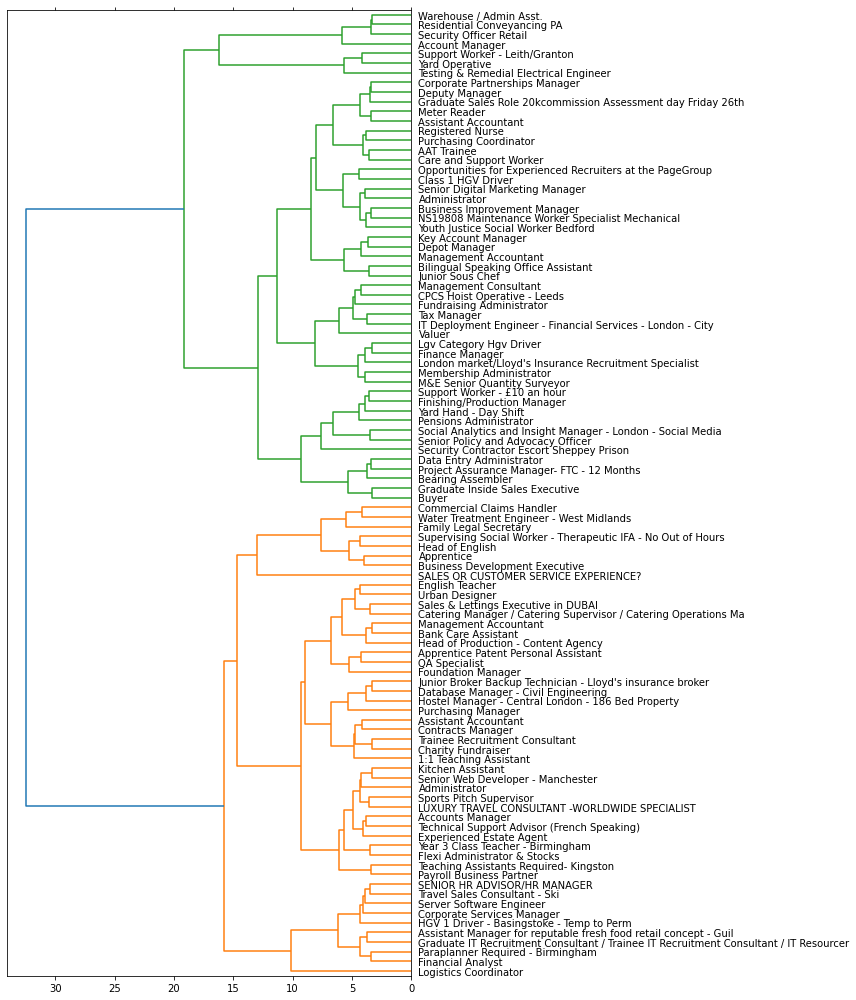

In [ ]:
import matplotlib.pyplot as plt
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))